In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [115]:
# Importing data
df = pd.read_csv("imputed_data.csv")
df.head(2)

,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,...,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
0,2021-05-12 17:56:25.000,3.691772,17.661523,16941.904350,36.472670,146.285825,7925.957227,81.975757,2210.712256,224.366480,...,212.936183,1087.730999,1.79588,13.118669,45.994059,0.481272,1075.254532,221.600735,36.796521,0.479000
1,2021-05-12 17:56:25.000,3.744628,0.193811,17554.954071,34.087434,161.762571,8049.518860,81.637472,2268.780322,0.005692,...,213.288686,2.082851,1.79588,10.353929,1.580861,0.337968,2.110829,0.005584,34.238289,0.312456


In [116]:
df.shape

(5476, 25)

#### Anomaly detection using isolation forest

In [ ]:
# Anomaly detection
data = df.iloc[:,1:]

model = IsolationForest(contamination=0.02, random_state=0)
df['anomaly'] = model.fit_predict(data)

In [118]:
# Count of anomalies detected
df['anomaly'].value_counts()

anomaly
 1    5366
-1     110
Name: count, dtype: int64

In [119]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [120]:
# PCA analysis
features = df.drop(columns=['Timestamp', 'anomaly', 'SI'])
labels = df['anomaly']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
pca_components = pca.fit_transform(features_scaled)

# Variance explained by each component
explained_var = pca.explained_variance_ratio_
for var in list(map(lambda x: float(round(x * 100, 1)), explained_var)):
    print(var)

31.0
21.7
10.2
8.5
6.2
4.5
4.1
3.4
2.6
2.1
1.4
1.0
0.9
0.7
0.5
0.4
0.4
0.2
0.1
0.1
0.0
0.0
0.0


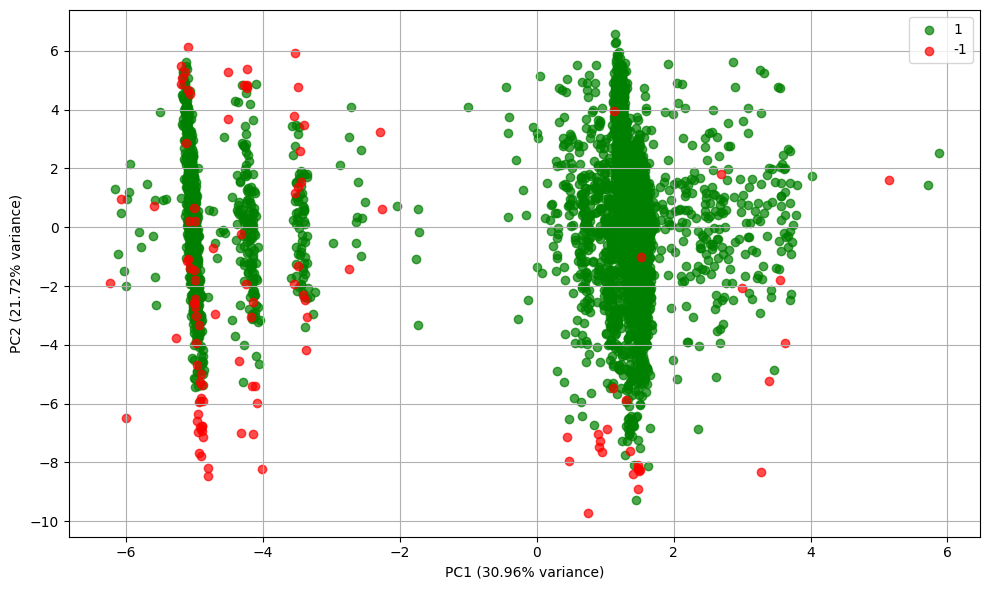

In [121]:
# PCA analysis with 2 components
features = df.drop(columns=['Timestamp', 'anomaly'])
labels = df['anomaly']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['anomaly'] = labels

plt.figure(figsize=(10, 6))
colors = {1: 'green', -1: 'red'}
for label in pca_df['anomaly'].unique():
    subset = pca_df[pca_df['anomaly'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], 
                c=colors[label], label=f'{label}', alpha=0.7)

# Add explained variance to axis labels
plt.xlabel(f'PC1 ({explained_var[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.2f}% variance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

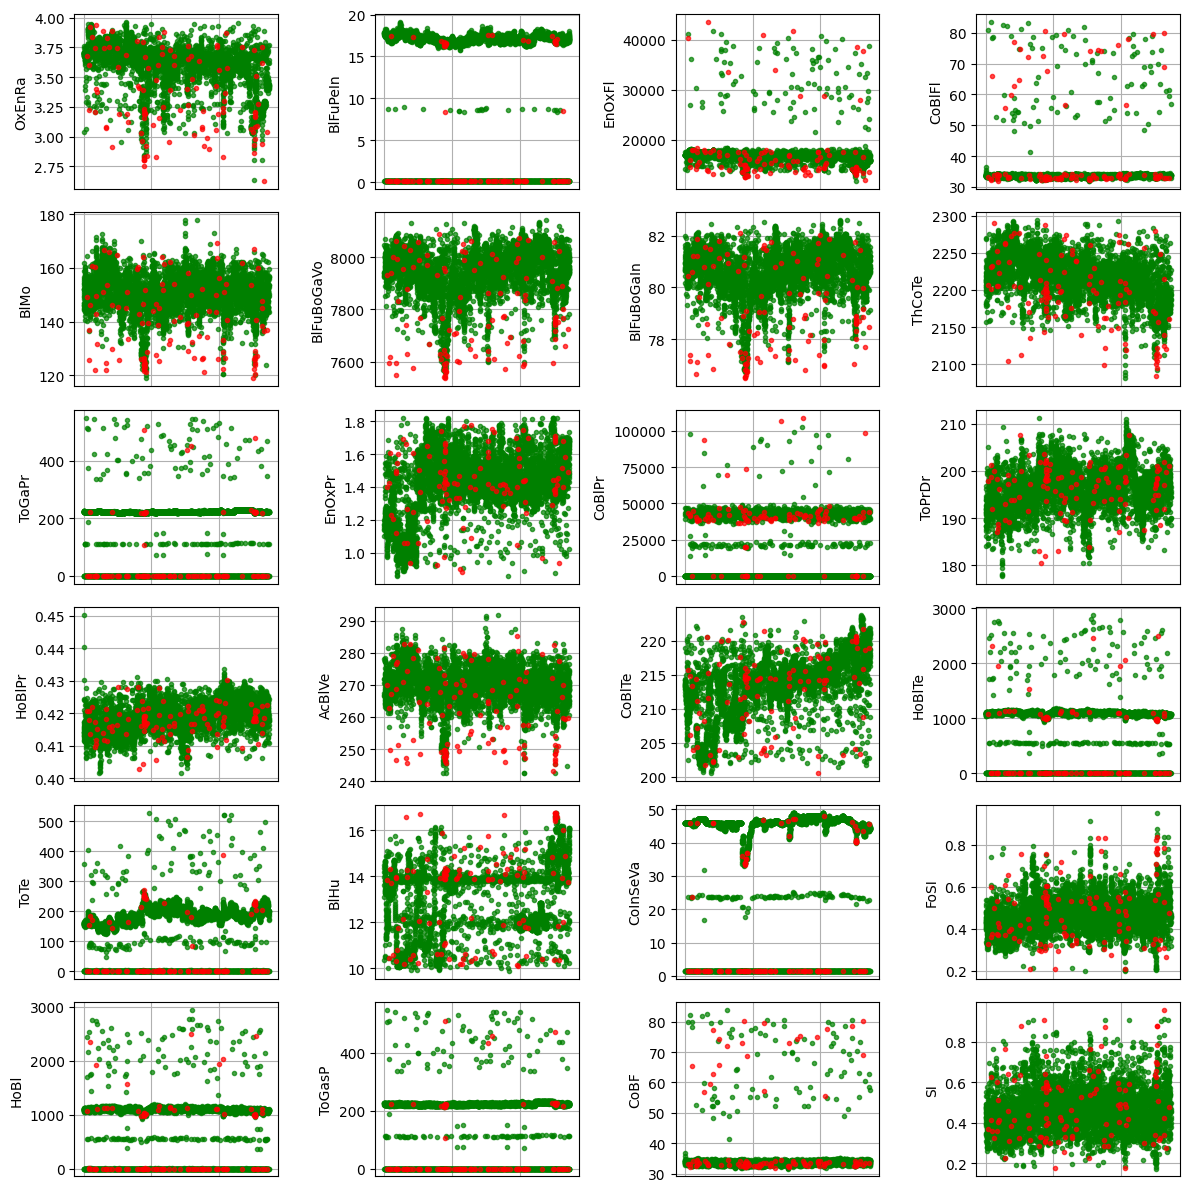

In [122]:
# plotting timeseries data for all variables with anomaly
fig, axes = plt.subplots(int(len(df.columns[1:-1])/4), 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df.columns[1:-1]):
    for label in df['anomaly'].unique():
        subset = df[df['anomaly'] == label]
        ax.plot(subset[col], c=colors[label], alpha=0.7, label=f'{label}', linestyle='', marker='o', markersize=3)
    ax.set_ylabel(col)
    ax.grid(True)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout()
plt.show()

In [123]:
# Saving data
df_anomaly_removed = df[df['anomaly']==1]
df_anomaly_removed = df_anomaly_removed.drop(columns=['anomaly'])
df_anomaly_removed.to_csv("anomaly_removed.csv", index=False)

In [2]:
df_anomaly_removed = pd.read_csv("anomaly_removed.csv")
df_anomaly_removed.head(2)

,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,...,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
0,2021-05-12 17:56:25.000,3.691772,17.661523,16941.904350,36.472670,146.285825,7925.957227,81.975757,2210.712256,224.366480,...,212.936183,1087.730999,1.79588,13.118669,45.994059,0.481272,1075.254532,221.600735,36.796521,0.479000
1,2021-05-12 17:56:25.000,3.744628,0.193811,17554.954071,34.087434,161.762571,8049.518860,81.637472,2268.780322,0.005692,...,213.288686,2.082851,1.79588,10.353929,1.580861,0.337968,2.110829,0.005584,34.238289,0.312456


In [3]:
df_anomaly_removed.shape

(5366, 25)

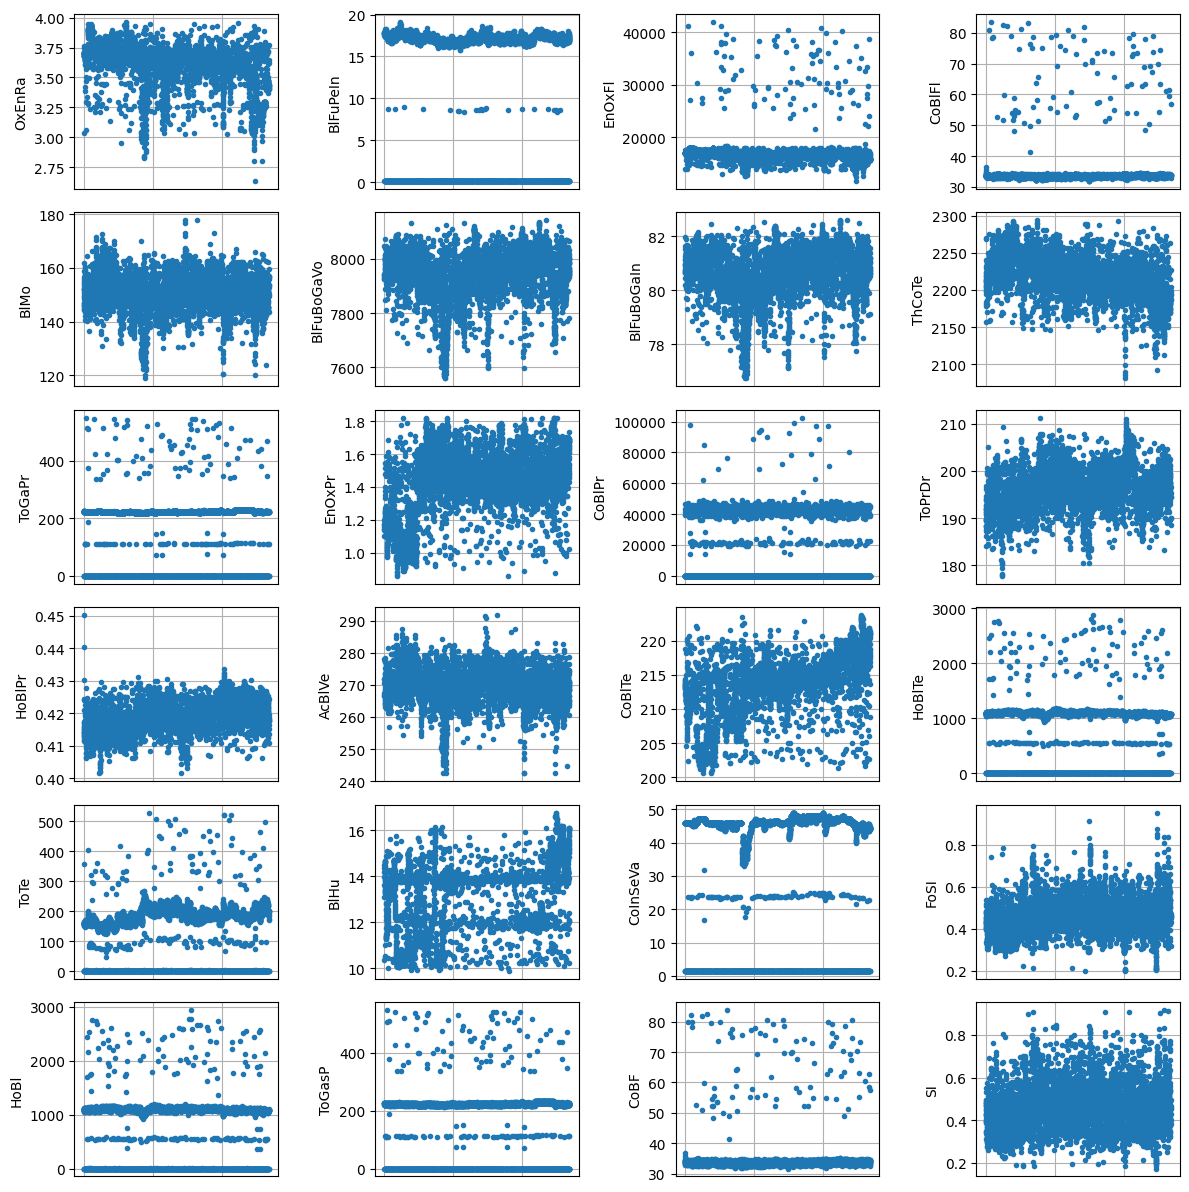

In [ ]:
# plotting timeseries data for all variables
fig, axes = plt.subplots(int(len(df_anomaly_removed.columns[1:])/4), 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df_anomaly_removed.columns[1:]):
    ax.plot(df_anomaly_removed[col], linestyle='', marker='o', markersize=3)
    # ax.scatter(df_anomaly_removed.loc[:,'Timestamp'], df_anomaly_removed[col], s=4)
    ax.set_ylabel(col)
    ax.grid(True)
    # ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout()
plt.show()

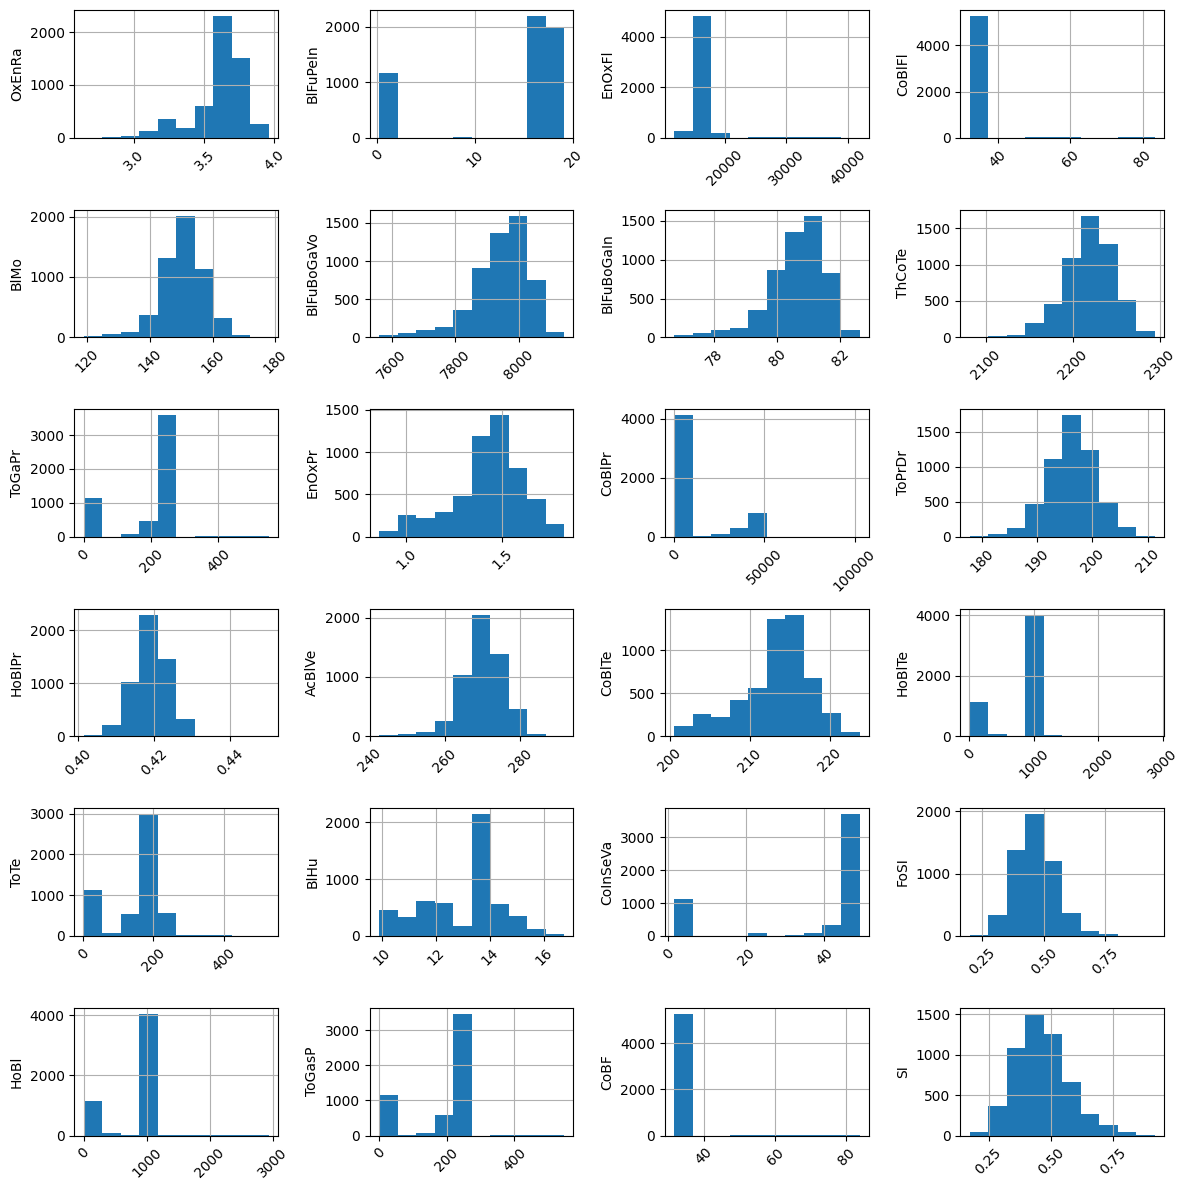

In [127]:
# plotting distribution for all variables
fig, axes = plt.subplots(int(len(df_anomaly_removed.columns[1:])/4), 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df_anomaly_removed.columns[1:]):
    ax.hist(df_anomaly_removed[col])
    ax.set_ylabel(col)
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

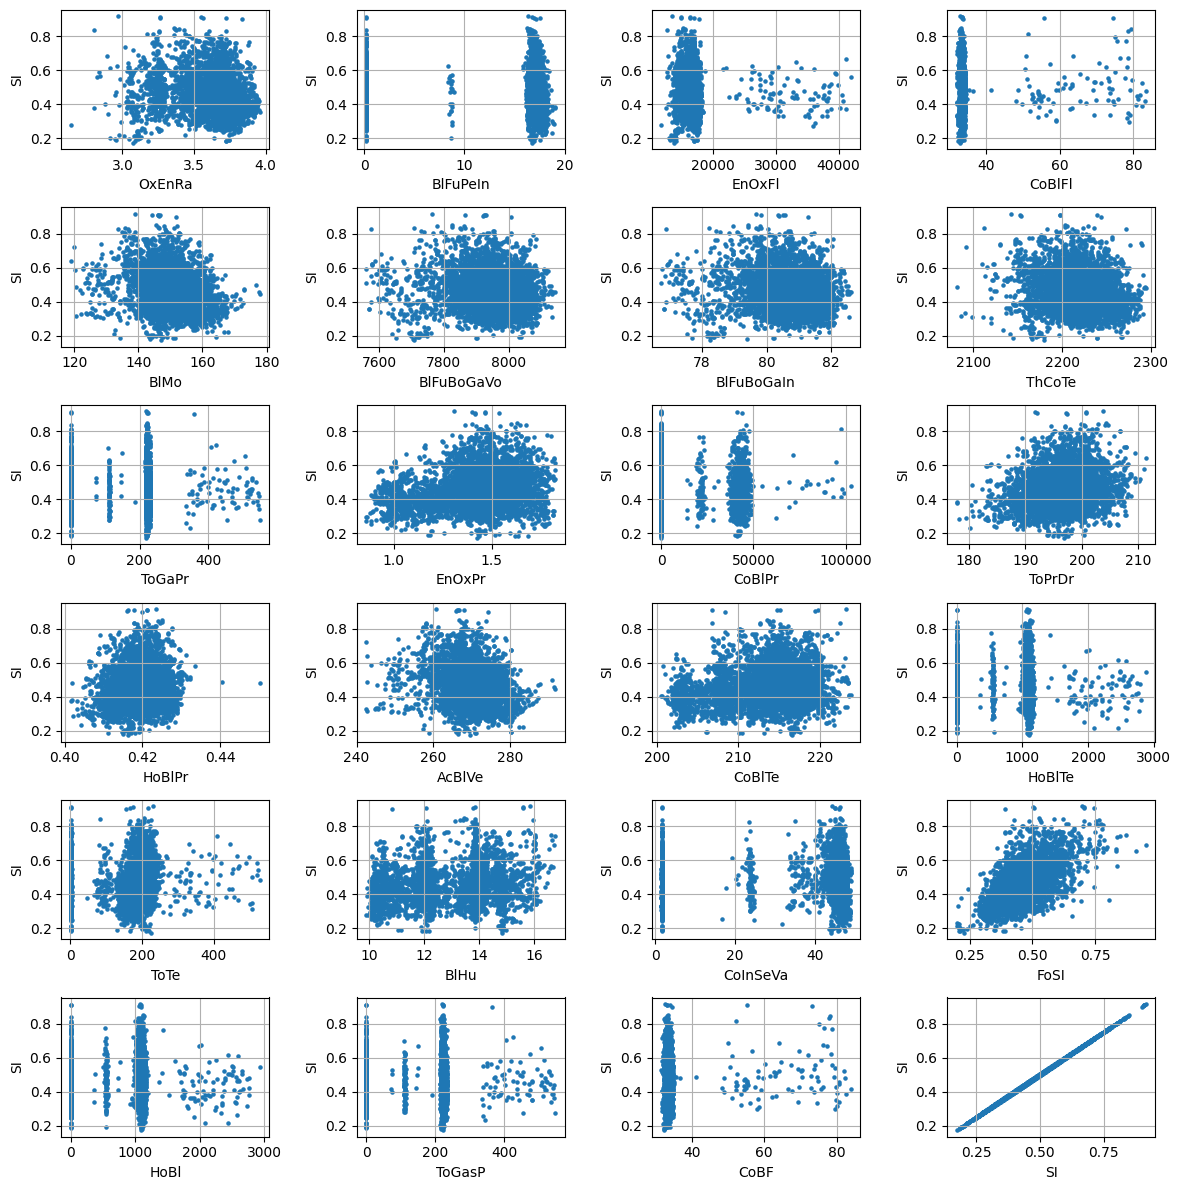

In [4]:
# plotting correlation for all X variables with Y variable
fig, axes = plt.subplots(int(len(df_anomaly_removed.columns[1:-1])/4)+1, 4, figsize=(12, 12))
axes = axes.ravel()
for ax, col in zip(axes, df_anomaly_removed.columns[1:]):
    ax.scatter(df_anomaly_removed[col], df_anomaly_removed.loc[:,'SI'], s=5)
    ax.set_xlabel(col)
    ax.set_ylabel('SI')
    ax.grid(True)
    # ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()